In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D,Flatten,Dropout,Conv2D,Input,Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(50000,)


In [3]:
#the number of classes
x_train[0]
k=len(set(y_train))
print(k)

10


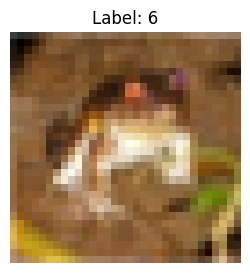

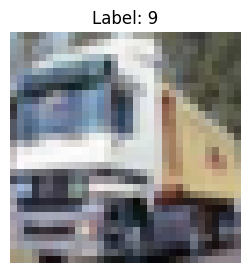

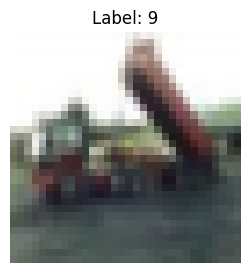

In [4]:
import matplotlib.pyplot as plt

# Display the first three images from x_train
for i in range(3):
    plt.figure(figsize=(3, 3))
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    plt.show()

In [6]:
num_classes = 10
# Load pre-trained ResNet50V2 model without top (final dense layers)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

94668760/94668760 [==============================] - 1s 0us/step


In [7]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [11]:
#making model
x = GlobalAveragePooling2D()(base_model.output)
# Dense layers for fine-tuning
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# Output layer with softmax activation for the number of classes
predictions = Dense(num_classes, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 18, 18, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

In [17]:
r = model.fit(x_train, y_train, epochs=18, validation_data=(x_test, y_test))

Epoch 1/18
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5165 - accuracy: 0.8242 - val_loss: 3.7848 - val_accuracy: 0.3565
Epoch 2/18
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4585 - accuracy: 0.8457 - val_loss: 4.0722 - val_accuracy: 0.3565
Epoch 3/18
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4151 - accuracy: 0.8597 - val_loss: 4.4565 - val_accuracy: 0.3497
Epoch 4/18
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3660 - accuracy: 0.8785 - val_loss: 4.7577 - val_accuracy: 0.3497
Epoch 5/18
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3333 - accuracy: 0.8898 - val_loss: 4.9588 - val_accuracy: 0.3516
Epoch 6/18
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3095 - accuracy: 0.8994 - val_loss: 5.2409 - val_accuracy: 0.3474
Epoch 7/18
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2873 - accuracy: 0.9061 - val_loss: 5.4795 -

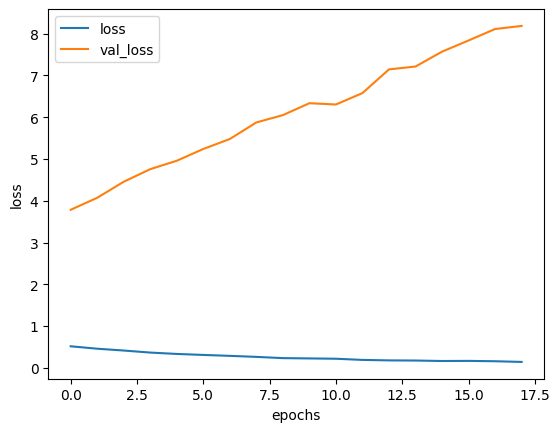

In [18]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc=0)

1/1 [==============================] - 0s 29ms/step


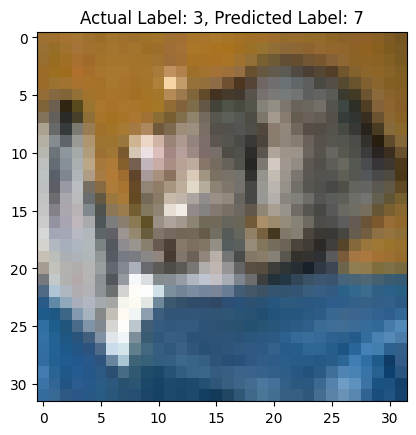

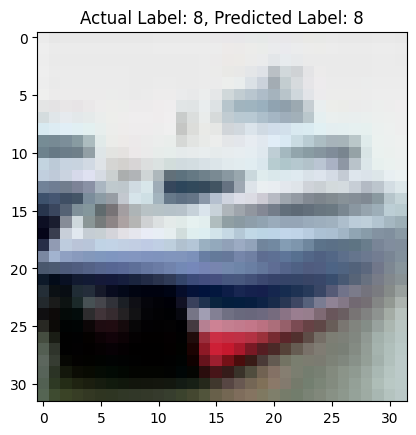

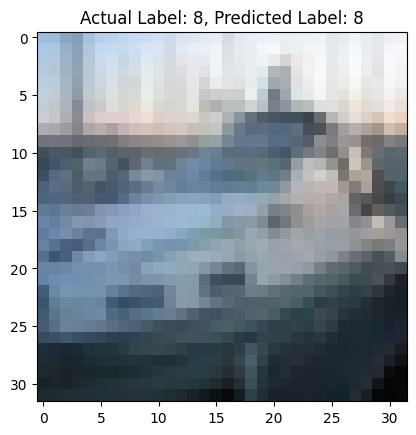

In [19]:
# Make predictions for the first three images
predictions = model.predict(x_test[:3])

# Convert predictions to class labels (index with the maximum probability)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(3):
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual Label: {y_test[i]}, Predicted Label: {predicted_labels[i]}")
    plt.show()

313/313 [==============================] - 3s 9ms/step
confusion matrix without normalization
cm


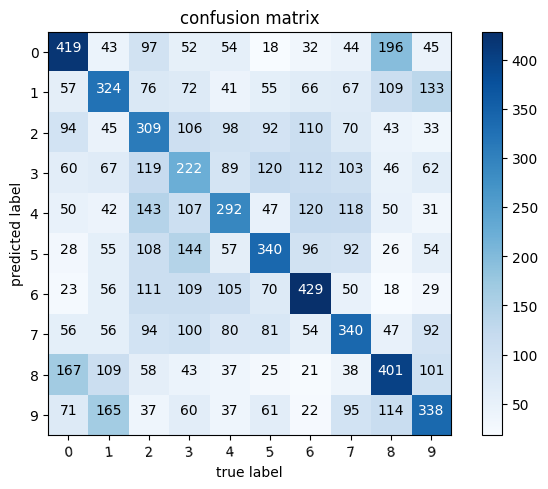

In [20]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalise=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
  ''' this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  '''
  if normalise:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.new_axis]
      print("normalize confusion matrix")
  else:
        print("confusion matrix without normalization")
        print("cm")
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=5)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalise else "d"
  thresh=cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white'if cm[i,j] >thresh else "black" )
  plt.tight_layout()
  plt.xlabel("true label")
  plt.ylabel('predicted label')
  plt.show()



p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [21]:
#drive link:https://drive.google.com/drive/folders/103dSV4O1hJueqbFS_28YQQdZTlLvuYXs